#### Using the Chicago Crime Dataset(any of the 3 sheets you choose), perfrom the following data preparation steps:
1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number) 
2. Use functions to create new columns for Months, Day, Season.
3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?
4.  According to location description, where does crime hapen the most?
5.  Did the Types of crime change as years go by? if yes/no. let the data show the insight.

This is my analysis of the chicago dataset given as an assignment my AltSchool DataScience Tutor.

In [1]:
# importing our reqired libaries

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# loading in our dataset

location = r'C:\Users\Rodiyat\Downloads'
file_name = '\chicago2.csv'

my_df = pd.read_csv(location + file_name)

Whenever i get my data, i run some inbuilt python functions to understand the type of data i'm working with.

In [3]:
# df.head is used to get the first 5 rows of my data
my_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,53000,4809324,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,...,21.0,71.0,18,1174545.0,1845186.0,2006,02/10/2018 03:50:01 PM,41.730582,-87.636172,"(41.730582057, -87.636172403)"
1,53001,2599849,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,38.0,16.0,06,1147850.0,1926182.0,2003,02/28/2018 03:56:25 PM,41.953398,-87.731888,"(41.953397577, -87.73188822)"
2,53002,7495181,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,...,28.0,29.0,08B,NaN,NaN,2009,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,53003,2628412,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,...,47.0,5.0,06,1158854.0,1923830.0,2003,02/28/2018 03:56:25 PM,41.946725,-87.691501,"(41.946724511, -87.691501175)"
4,53004,8389615,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,...,17.0,68.0,26,1169905.0,1856761.0,2011,02/04/2016 06:33:39 AM,41.762447,-87.652835,"(41.762447305, -87.652834901)"


In [4]:
# df.tail is used to get the last 5 rows of my data
my_df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
995,53995,9619330,HX269158,05/19/2014 06:00:00 PM,088XX S WABASH AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,...,6.0,44.0,26,1178260.0,1846297.0,2014,02/04/2016 06:33:39 AM,41.733547,-87.622530,"(41.733547403, -87.622529593)"
996,53996,11053559,JA390202,08/11/2017 04:00:00 PM,137XX S JEFFERY AVE,0610,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,False,...,10.0,55.0,05,1191658.0,1814171.0,2017,02/10/2018 03:50:01 PM,41.645076,-87.574483,"(41.645075822, -87.574483491)"
997,53997,12023154,JD201316,03/21/2020 09:00:00 AM,058XX N WHIPPLE ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,...,40.0,2.0,11,1154971.0,1938707.0,2020,04/08/2020 03:49:33 PM,41.987627,-87.705373,"(41.987626778, -87.705373183)"
998,53998,1604980,G367198,06/23/2001 05:00:00 PM,070XX S OGLESBY AV,0820,THEFT,$500 AND UNDER,STREET,False,...,NaN,NaN,06,1192939.0,1858982.0,2001,08/17/2015 03:03:40 PM,41.768011,-87.568341,"(41.768010848, -87.568340708)"
999,53999,2660948,HJ275409,04/01/2003 10:00:00 AM,030XX S THROOP ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,...,11.0,60.0,05,1170351.0,1884713.0,2003,02/10/2018 03:50:01 PM,41.839141,-87.650386,"(41.839140939, -87.650386262)"


In [5]:
# df.columns is used to get the columns in my data
my_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [6]:
# df.index is used to get access to the number of rows present in our dataset 
my_df.index

RangeIndex(start=0, stop=1000, step=1)

In [7]:
# df.values is used to get the middle segment(numpy representation) of our data
my_df.values

array([[53000, 4809324, 'HM300447', ..., 41.730582057, -87.636172403,
        '(41.730582057, -87.636172403)'],
       [53001, 2599849, 'HJ197748', ..., 41.953397577, -87.73188822,
        '(41.953397577, -87.73188822)'],
       [53002, 7495181, 'HR183541', ..., nan, nan, nan],
       ...,
       [53997, 12023154, 'JD201316', ..., 41.987626778, -87.705373183,
        '(41.987626778, -87.705373183)'],
       [53998, 1604980, 'G367198', ..., 41.768010848, -87.568340708,
        '(41.768010848, -87.568340708)'],
       [53999, 2660948, 'HJ275409', ..., 41.839140939, -87.650386262,
        '(41.839140939, -87.650386262)']], dtype=object)

In [8]:
# type function is used to understand the type of objects present in our data
type(my_df)

pandas.core.frame.DataFrame

In [9]:
# df.shape is use to give a total estimate of all our data values
my_df.shape

(1000, 23)

In [10]:
# df.info is used to better understand our dataframe
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Case Number           1000 non-null   object 
 3   Date                  1000 non-null   object 
 4   Block                 1000 non-null   object 
 5   IUCR                  1000 non-null   object 
 6   Primary Type          1000 non-null   object 
 7   Description           1000 non-null   object 
 8   Location Description  999 non-null    object 
 9   Arrest                1000 non-null   bool   
 10  Domestic              1000 non-null   bool   
 11  Beat                  1000 non-null   int64  
 12  District              1000 non-null   float64
 13  Ward                  929 non-null    float64
 14  Community Area        929 non-null    float64
 15  FBI Code              

In [11]:
# df.describe does exactly what you think it does; it describes our data(lol)
my_df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1000.000000,1.000000e+03,1000.000000,1000.000000,929.000000,929.000000,9.870000e+02,9.870000e+02,1000.000000,987.000000,987.000000
mean,53499.500000,6.936368e+06,1202.313000,11.507000,23.571582,36.550054,1.164625e+06,1.887975e+06,2009.722000,41.848200,-87.671349
std,288.819436,3.362715e+06,711.664699,7.036154,14.293396,21.866363,1.657587e+04,3.184801e+04,5.890961,0.087591,0.060334
min,53000.000000,2.260600e+04,111.000000,1.000000,1.000000,1.000000,1.100317e+06,1.814171e+06,2001.000000,41.645076,-87.906463
25%,53249.750000,3.842856e+06,623.000000,6.000000,11.000000,22.000000,1.153314e+06,1.860908e+06,2005.000000,41.774051,-87.712202
50%,53499.500000,7.032190e+06,1112.500000,11.000000,24.000000,32.000000,1.165973e+06,1.893913e+06,2009.000000,41.864496,-87.665804
75%,53749.250000,9.846722e+06,1733.000000,17.000000,35.000000,55.000000,1.176432e+06,1.911064e+06,2014.000000,41.911833,-87.628321
max,53999.000000,1.277162e+07,2535.000000,25.000000,50.000000,77.000000,1.204890e+06,1.951001e+06,2022.000000,42.021179,-87.525488


In [12]:
#Checking for missing values
my_df.isnull().sum()

Unnamed: 0               0
ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     1
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    71
Community Area          71
FBI Code                 0
X Coordinate            13
Y Coordinate            13
Year                     0
Updated On               0
Latitude                13
Longitude               13
Location                13
dtype: int64

#### 1. Use a funtion to Drop redundant columns (a redundant column is one that gives infromation that another column already explains: eg ID and Case number) 

In [13]:
def drop_columns(data, columns):
    """
    Drops specified columns from a DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame from which columns are to be dropped.
    columns (list): The list of column names to be dropped.

    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    data.drop(columns=columns, inplace=True)
    return data

my_df= drop_columns(my_df, ['Unnamed: 0', 'X Coordinate', 'Ward', 'Community Area', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'])
my_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On
0,4809324,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,18,2006,02/10/2018 03:50:01 PM
1,2599849,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,06,2003,02/28/2018 03:56:25 PM
2,7495181,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,08B,2009,08/17/2015 03:03:40 PM
3,2628412,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,06,2003,02/28/2018 03:56:25 PM
4,8389615,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,26,2011,02/04/2016 06:33:39 AM



#### 2. Use functions to create new columns for Months, Day, Season.

In [16]:
my_df['Date'] = pd.to_datetime(my_df['Date'])

def add_date(my_df, date_column):
    """
    This function adds 'Month', 'Day', and 'Season' columns to the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to which the columns will be added.
    date_column (str): The name of the column in df that contains the date information.

    Returns:
    pandas.DataFrame: The DataFrame with the added columns.
    """
    my_df['Month'] = my_df[date_column].dt.month
    my_df['Day'] = my_df[date_column].dt.day
    my_df['Season'] = my_df[date_column].apply(get_season)
    return my_df


def get_season(date):
    """
    This function determines the season of a given date.

    Parameters:
    date (datetime): The date for which the season is to be determined.

    Returns:
    str: The season of the date ('Spring', 'Summer', 'Autumn', or 'Winter').
    """
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'


my_df = add_date(my_df, 'Date')

my_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On,Month,Day,Season
0,4809324,HM300447,2006-04-19 16:45:02,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,18,2006,02/10/2018 03:50:01 PM,4,19,Spring
1,2599849,HJ197748,2003-02-21 18:30:00,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,06,2003,02/28/2018 03:56:25 PM,2,21,Winter
2,7495181,HR183541,2009-02-22 19:42:00,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,08B,2009,08/17/2015 03:03:40 PM,2,22,Winter
3,2628412,HJ231141,2003-03-07 14:46:00,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,06,2003,02/28/2018 03:56:25 PM,3,7,Spring
4,8389615,HT622350,2011-12-06 00:00:00,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,26,2011,02/04/2016 06:33:39 AM,12,6,Winter


### Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?

In [ ]:
# distribution of crimes for each Months, Days, Seasons



In [47]:
# frequency of the crimes(highest and lowest)

# Group by type of crime and count the number of occurrences
crime_type_counts = my_df.groupby('Primary Type').size()

# Find the type of crime with the most occurrences
most_common_crime = crime_type_counts.idxmax()

# Find the type of crime with the least occurrences
least_common_crime = crime_type_counts.idxmin()


#### 4. According to location description, where does crime happen the most?

In [36]:
# Total number of crime committed in a specific location

location_of_total_crime_committed = my_df['Location Description'].value_counts()
location_of_total_crime_committed

Location Description
STREET                                            255
RESIDENCE                                         169
APARTMENT                                         123
SIDEWALK                                           87
OTHER                                              35
                                                 ... 
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA      1
SCHOOL, PUBLIC, GROUNDS                             1
VACANT LOT/LAND                                     1
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA          1
DAY CARE CENTER                                     1
Name: count, Length: 61, dtype: int64

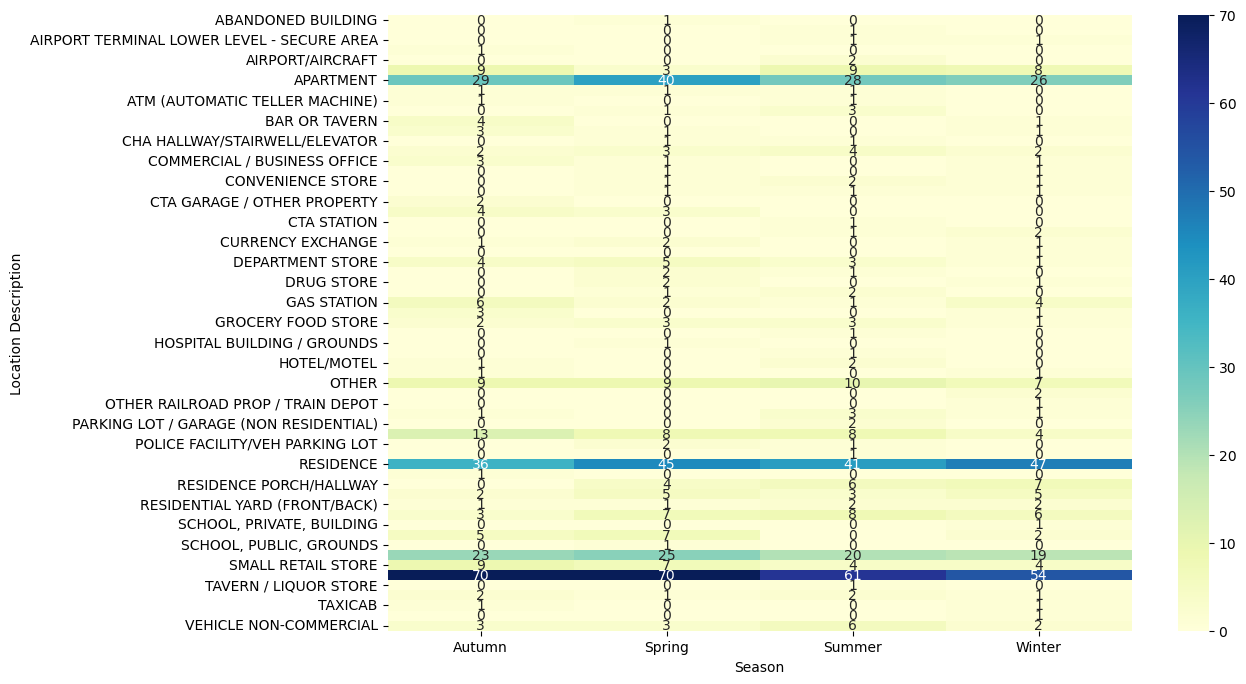

In [37]:
# is there a correlation between the location of crime committed and season?

location_season_counts = my_df.groupby(['Location Description', 'Season']).size()

# Creating a cross-tabulation of 'Location' and 'Season'
cross_tab = pd.crosstab(my_df['Location Description'], my_df['Season'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, cbar=True)
plt.show()


#### 5. Did the types of crime change as years go by? If yes/no. Let the data show the insight.

In [38]:
crime_by_year = my_df.groupby(['Primary Type', my_df['Date'].dt.year])['Case Number'].count()

crime_by_year

Primary Type       Date
ASSAULT            2001    2
                   2002    4
                   2003    3
                   2004    4
                   2005    1
                          ..
WEAPONS VIOLATION  2006    1
                   2010    1
                   2019    2
                   2020    1
                   2022    2
Name: Case Number, Length: 260, dtype: int64